# Introduction to machine learning & Data Analysis

Basic introduction on how to perform typical machine learning tasks with Python.

Prepared by Mykhailo Vladymyrov & Aris Marcolongo,
Data Science Lab, University Of Bern, 2022

This work is licensed under <a href="https://creativecommons.org/share-your-work/public-domain/cc0/">CC0</a>.

# Part 1.

# What is Machine Learning?

## Why Machine Learning?



1.   
2.   
3.  





## Learning from data

Unlike classical algorithms, created by a human to analyze some data:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_1.png" width="60%"/>

in machine learning the data itself is used for to define the algorithm:

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_2.png" width="60%"/>

Machine learning - is learnign from data.
If 
* performance on a task **T**
* improves according to measure **P**
* with experience **E**

we say that model learns form data.


<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/alg_3.png" width="60%"/>


The boundary is a bit fuzzy.

In fact when we create algorithms, the problem in hand (namely the data  related to the problem), drives us to choose one or another algorithm. And we then tune it, to perform well on a task in hand. 

Machine Learning (ML) formalized this procedure, allowing us to automate (part) of this process.

In this course you will get acquainted with the basics of Machine Learning — where the approach to handling the data (the algorithm) is defined, or as we say "learned" from data in hand.

## Classification vs Regression.

The two main tasks handled by (supervised) ML is regression and classification.
In regression we aim at modeling the relationship between the system's response (dependent variable) and one or more explanatory variables (independent variables).

Examples of regression would be predicting the temperature for each day of the year, or expenses of the household as a function of the number of children and adults.

In classification the aim is to identify what class does a data-point belong to. For example, the species or the iris plant based on the size of its petals, or whether an email is spam or not based on its content.

## Performance measures


1. Regression:
* Mean Square Error: $\textrm{MSE}=\frac{1}{n}\sum_i(y_i - \hat y(\bar x_i))^2$
* Mean Absolute Error: $\textrm{MAE}=\frac{1}{n}\sum_i|y_i - \hat y(\bar x_i)|$
* Median Absolute Deviation: $\textrm{MAD}=\textrm{median}(|y_i - \hat y(\bar x_i)|)$
* Fraction of the explained variance: $R^2=1-\frac{\sum_i(y_i - \hat y(\bar x_i))^2}{\sum_i(y_i - \bar y_i)^2}$, where $\bar y=\frac{1}{n}\sum_i y_i$

2. Classification:
* Confusion matrix 


<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/confusion_mtr.png" width="46%"/>

* Accuracy $=\frac{\textrm{TP} + \textrm{TN}}{\textrm{TP} + \textrm{FP} + \textrm{FN} + \textrm{TN}}$
* Precision $=\frac{\textrm{TP}}{\textrm{TP} + \textrm{FP}}$ 
* Recall $=\frac{\textrm{TP}}{\textrm{TP} + \textrm{FN}}$
* F1 $=\frac{2}{\frac{1}{\textrm{Precision}} + \frac{1}{\textrm{Recall}} } = 2\frac{\textrm{Precision} \cdot \textrm{Recall}}{\textrm{Precision} + \textrm{Recall}} = \frac{2 \textrm{TP}}{2 \textrm{TP} + \textrm{FP} + \textrm{FN}} = \frac{\textrm{TP}}{\textrm{TP} + \frac{\textrm{FP} + \textrm{FN}}{2}}$
* F2 $=\frac{5}{\frac{1}{\textrm{Precision}} + \frac{4}{\textrm{Recall}} } = 5\frac{\textrm{Precision} \cdot \textrm{Recall}}{4 \cdot \textrm{Precision} + \textrm{Recall}} = \frac{5 \textrm{TP}}{5 \textrm{TP} + \textrm{FP} + 4 \cdot \textrm{FN}} = \frac{\textrm{TP}}{\textrm{TP} + \frac{\textrm{FP} + 4 \cdot\textrm{FN}}{5}}$
* Threat score (TS), or Intersection over Union: $\mathrm{IoU}=\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}+\mathrm{FP}}$


During model optimization the used measure in most cases must be differentiable. To this end usually some measure of similarities of distributions are employed (e.g. cross-entropy).

## Actual aim: Generalization

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Bias_variance_1.png" width="35%"/>

<img src="https://github.com/neworldemancer/DSF5/raw/master/figures/Bias_variance_2.png" width="60%"/>

To measure model performance in an unbiassed way, we need to use different data than the data that the model was trained on. For this we use the 'train-test' split: e.g. 20% of all available dataset is reserved for model performance test, and the remaining 80% is used for actual model training.

# Load libraries

In [2]:
# Scikit-learn (formerly scikits.learn and also known as sklearn) is a free 
# software machine learning library for the Python programming language. 
# It features various classification, regression and clustering algorithms, 
# and is designed to interoperate with the Python numerical and scientific 
# libraries NumPy and SciPy. (from wiki)

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

2022-10-14 08:51:15.586509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
pip install dtreeviz

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

In [ ]:
if not os.path.exists('data'):
    path = os.path.abspath('.')+'/colab_material.tgz'
    tf.keras.utils.get_file(path, 'https://github.com/neworldemancer/DSF5/raw/master/colab_material.tgz')
    tar = tarfile.open(path, "r:gz")
    tar.extractall()
    tar.close()

# Datasets

In this course we will use several synthetic and real-world datasets to illustrate the behavior of the models and exercise our skills.

## 1. Synthetic linear

In [ ]:
def get_linear(n_d=1, n_points=10, w=None, b=None, sigma=5):
  x = np.random.uniform(0, 10, size=(n_points, n_d))
  
  w = w or np.random.uniform(0.1, 10, n_d)
  b = b or np.random.uniform(-10, 10)
  y = np.dot(x, w) + b + np.random.normal(0, sigma, size=n_points)

  print('true slopes: w =', w, ';  b =', b)

  return x, y

In [ ]:
x, y = get_linear(n_d=1, sigma=1)
plt.plot(x[:, 0], y, '*')
plt.show()

In [ ]:
n_d = 2
x, y = get_linear(n_d=n_d, n_points=100)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, marker='x', color='b',s=10)
plt.show()

## 2. House prices

Subset of the Ames Houses dataset: http://jse.amstat.org/v19n3/decock.pdf

In [ ]:
def house_prices_dataset(return_df=False, return_df_xy=False, price_max=400000, area_max=40000):
  path = 'data/AmesHousing.csv'

  df = pd.read_csv(path, na_values=('NaN', ''), keep_default_na=False,  )
  
  rename_dict = {k:k.replace(' ', '').replace('/', '') for k in df.keys()}
  df.rename(columns=rename_dict, inplace=True)
  
  useful_fields = ['LotArea',
                  'Utilities', 'OverallQual', 'OverallCond',
                  'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
                  'HeatingQC', 'CentralAir', 'Electrical',
                  '1stFlrSF', '2ndFlrSF','GrLivArea',
                  'FullBath', 'HalfBath',
                  'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
                  'Functional','PoolArea',
                  'YrSold', 'MoSold'
                  ]
  target_field = 'SalePrice'

  df.dropna(axis=0, subset=useful_fields+[target_field], inplace=True)

  cleanup_nums = {'Street':      {'Grvl': 0, 'Pave': 1},
                  'LotFrontage': {'NA':0},
                  'Alley':       {'NA':0, 'Grvl': 1, 'Pave': 2},
                  'LotShape':    {'IR3':0, 'IR2': 1, 'IR1': 2, 'Reg':3},
                  'Utilities':   {'ELO':0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3},
                  'LandSlope':   {'Sev':0, 'Mod': 1, 'Gtl': 3},
                  'ExterQual':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'ExterCond':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'BsmtQual':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtCond':    {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'BsmtExposure':{'NA':0, 'No':1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                  'BsmtFinType1':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'BsmtFinType2':{'NA':0, 'Unf':1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ':5, 'GLQ':6},
                  'HeatingQC':   {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'CentralAir':  {'N':0, 'Y': 1},
                  'Electrical':  {'':0, 'NA':0, 'Mix':1, 'FuseP':2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
                  'KitchenQual': {'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Functional':  {'Sal':0, 'Sev':1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2':5, 'Min1':6, 'Typ':7},
                  'FireplaceQu': {'NA':0, 'Po':1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5},
                  'PoolQC':      {'NA':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex':4},
                  'Fence':       {'NA':0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv':4},
                  }

  df_X = df[useful_fields].copy()                              
  df_X.replace(cleanup_nums, inplace=True)  # convert continous categorial variables to numerical
  df_Y = df[target_field].copy()

  x = df_X.to_numpy().astype(np.float32)
  y = df_Y.to_numpy().astype(np.float32)

  if price_max>0:
    idxs = y<price_max
    x = x[idxs]
    y = y[idxs]

  if area_max>0:
    idxs = x[:,0]<area_max
    x = x[idxs]
    y = y[idxs]

  return (x, y, df) if return_df else ((x, y, (df_X, df_Y)) if return_df_xy else (x,y))

In [ ]:
x, y, df = house_prices_dataset(return_df=True)
print(x.shape, y.shape)
df.head()

In [ ]:
df.describe()

In [ ]:
house_prices_dataset(return_df=True)

In [ ]:
plt.plot(x[:, 0], y, '.')
plt.xlabel('area, sq.ft')
plt.ylabel('price, $');
plt.show()

## 3. Blobs

In [ ]:
x, y = make_blobs(n_samples=1000, centers=[[0,0], [5,5], [10, 0]])
colors = "ygr"
for i, color in enumerate(colors):
    idx = y == i
    plt.scatter(x[idx, 0], x[idx, 1], c=color, edgecolor='gray', s=25)
plt.show()

In [ ]:
x, y = make_blobs(n_samples=1000, centers=[[0,0], [5,5], [10, 0]])

transformation = [[0.4, 0.2], [-0.4, 1.2]]  # affine transformation matrix
x = np.dot(x, transformation)               # applied to point coordinated to make blobs less separable

colors = "ygr"
for i, color in enumerate(colors):
    idx = y == i
    plt.scatter(x[idx, 0], x[idx, 1], c=color, edgecolor='gray', s=25)
plt.show()



## 4. MNIST

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting (taken from http://yann.lecun.com/exdb/mnist/). Each example is a 28x28 grayscale image and the dataset can be readily downloaded from Tensorflow.

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



Let's check few samples:

In [ ]:
n = 3
fig, ax = plt.subplots(n, n, figsize=(2*n, 2*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='r', size=16)
  axi.grid(False)
plt.tight_layout(0,0,0)
plt.show()

## 5. Fashion MNIST

`Fashion-MNIST` is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. (from https://github.com/zalandoresearch/fashion-mnist)

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Let's check few samples:

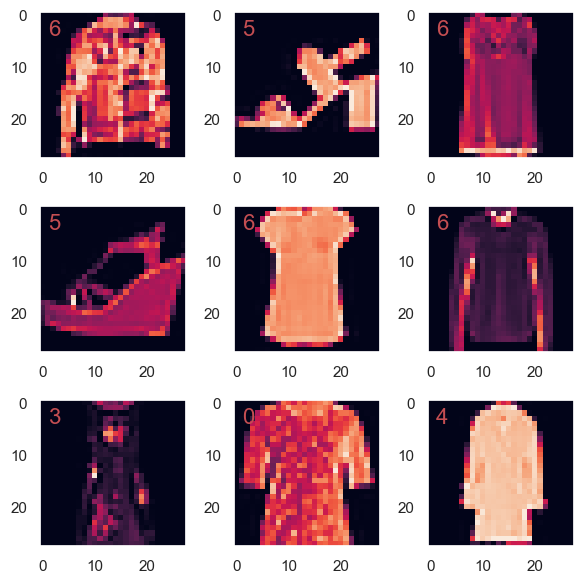

In [10]:
n = 3
fig, ax = plt.subplots(n, n, figsize=(2*n, 2*n))
ax = [ax_xy for ax_y in ax for ax_xy in ax_y]
for axi, im_idx in zip(ax, np.random.choice(len(train_images), n**2)):
  im = train_images[im_idx]
  im_class = train_labels[im_idx]
  axi.imshow(im) #axi.imshow(im, cmap='gray')
  axi.text(1, 4, f'{im_class}', color='r', size=16)
  axi.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
fmnist_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Each of the training and test examples is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## 6. Weather dataset

This is a weather time series [dataset](https://www.bgc-jena.mpg.de/wetter/) recorded by the Max Planck Institute for Biogeochemistry 
It contains weather reacord for 8 years of observation.

In [ ]:
def get_weather_df():
  # inspired by https://www.tensorflow.org/tutorials/structured_data/time_series

  # download and extract dataset
  zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
  csv_path, _ = os.path.splitext(zip_path)

  # load into pandas df
  df = pd.read_csv(csv_path)
  
  # dataset contains records every 10 min, we use hourly records only, thus
  # slice [start:stop:step], starting from index 5 take every 6th record
  df = df[5::6]

  # replace errors in wind velocity to 0
  wv = df['wv (m/s)']
  bad_wv = wv == -9999.0
  wv[bad_wv] = 0.0

  max_wv = df['max. wv (m/s)']
  bad_max_wv = max_wv == -9999.0
  max_wv[bad_max_wv] = 0.0

  # obtain timestamps from text time format
  date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
  timestamp_s = date_time.map(pd.Timestamp.timestamp)
  # genarate cyclic features for year and day
  day = 24*60*60
  year = (365.2425) * day

  df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
  df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
  df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
  df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

  return df

In [ ]:
weather_df = get_weather_df()

In [ ]:
weather_df.head()

In [ ]:
weather_df.describe().T

In [ ]:
plt.plot(weather_df['Year cos'])
plt.plot(weather_df['Year sin'])

In [ ]:
plt.plot(weather_df['Day cos'][:7*24])
plt.plot(weather_df['Day sin'][:7*24])

In [ ]:
def gen_future_T_dataset(X_len=24, Y_offset=48,
                         X_features=['p (mbar)', 'T (degC)', 'rh (%)', 'wv (m/s)', 'wd (deg)', 'Day sin', 'Day cos', 'Year sin', 'Year cos'],
                         Y_features='T (degC)',
                         standardize=True,
                         oversample=10
                         ):
  """
  Generates pairs of input-label, using sequence of `X_len` samples as input
  and value at offset `Y_offset` from start of this sequence as label.
  Sample sequnces arte taken at random positions throughout the dataset.
  Number of samples is obtained assuming non-overlaping wondows.
  Oversampling factor allows to increase this value.

  Args:
    X_len (int): length of sample sequence
    Y_offset (int): offset to the target value from the sequence start
    X_features (list or str): features to be used as input
    Y_features (list or str): features to be used as labels
    standardize (Bool): flag whether to standardize the columns
    oversample (int): increases number of samples by this factor wrt baseline
                      n = len(df) // (Y_offset+1)
  """
  weather_df = get_weather_df()

  if standardize:
    mean = weather_df.mean()
    std = weather_df.std()
    weather_df = (weather_df - mean) / std
  
  df_X = weather_df[X_features]
  df_Y = weather_df[Y_features]

  n_records = len(df_X)
  sample_len = Y_offset+1
  n_samples = int((n_records-sample_len)//sample_len*oversample)
  offsets = np.random.randint(0, n_records-sample_len, size=n_samples)
  offsets.sort()

  X = []
  Y = []
  for o in offsets:
    X.append(np.array(df_X[o:o+X_len]))
    Y.append(np.array(df_Y[o+Y_offset:o+Y_offset+1]))

  X = np.stack(X)
  Y = np.concatenate(Y)

  return X, Y

In [ ]:
x, y = gen_future_T_dataset()

In [ ]:
x.shape, y.shape

In [ ]:
for f,fn in enumerate(['p (mbar)', 'T (degC)', 'rh (%)', 'wv (m/s)', 'wd (deg)', 'Day sin', 'Day cos', 'Year sin', 'Year cos']):
  plt.figure(figsize=(5*(1+(f==1)), 4))
  for s in range(10):
    plt.plot(x[s, :, f])
    if f==1:
      plt.scatter(48, y[s], color=plt.gca().lines[-1].get_color())
  plt.title(fn)
  plt.show()

# `scikit-learn` interface

In this course we will primarily use the `scikit-learn` module.
You can find extensive documentation with examples in the [user guide](https://scikit-learn.org/stable/user_guide.html)

The module contains A LOT of different machine learning methods, and here we will cover only few of them. What is great about `scikit-learn` is that it has a uniform and consistent interface. 

All the different ML approaches are implemented as classes with a set of same main methods:

1. `fitter = ...`: Create fitter object.
2. `fitter.fit(x, y[, sample_weight])`: Fit model to predict from list of smaples `x` a list of target values `y`.
3. `y_pred = fitter.predict(X)`: Predict using the trained model.
4. `s = fitter.score(x, y[, sample_weight])`: Obtain a relevant performance measure of the trained model.

This allows one to easily replace one approach with another and find the best one for the problem at hand, by simply using a regression/classification object of another class, while the rest of the code can remain the same.


It is useful to know that generally in scikit-learn the input data is represented as a matrix $X$ of dimensions `n_samples x n_features` , whereas the supervised labels/values are stored in a matrix $Y$ of dimensions `n_samples x n_target` .

# 1.Linear models

In many cases the scalar value of interest - dependent variable - is (or can be approximated as) linear combination of the independent variables. 

In linear regression the estimator is searched in the form: $$\hat{y}(\bar{x} | \bar{w}) = w_0 + w_1 x_1 + ... + w_p x_p$$

The parameters $\bar{w} = (w_1,..., w_p)$ and $w_0$ are designated as `coef_` and `intercept_` in `sklearn`.

Reference: https://scikit-learn.org/stable/modules/linear_model.html

## 1. Linear regression

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fits a linear model with coefficients $\bar{w} = (w_1,..., w_p)$ and $w_0$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Mathematically it solves a problem of the form:  $$\bar{w} = \min_{w_i} || \bar{X} \cdot \bar{w} - y||_2^2$$

In [ ]:
x, y = get_linear(n_d=1, sigma=3, n_points=30)  # p==1, 1D input
plt.scatter(x, y);
plt.show()

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

In [ ]:
w, w0 = reg.coef_, reg.intercept_
print(w, w0)

In [ ]:
plt.scatter(x, y, marker='*', label='data points')
x_f = np.linspace(x.min(), x.max(), 10)
y_f = w0 + w[0] * x_f
plt.plot(x_f, y_f, label='fit', c='r')
plt.legend()
plt.show()

In [ ]:
# mse
np.std(y - reg.predict(x))  # or use metrics.mean_squared_error(..., squared=False)

In [ ]:
# R2
reg.score(x, y) 

Let's try 2D input. 
Additionally, here we will split the whole dataset into training and test subsets using the `train_test_split` function:

In [ ]:
n_d = 2
x, y = get_linear(n_d=n_d, n_points=1000, sigma=5)

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, marker='x', s=40)
ax.scatter(x_test[:,0], x_test[:,1], y_test, marker='+', s=80)

xx0 = np.linspace(x[:,0].min(), x[:,0].max(), 10)
xx1 = np.linspace(x[:,1].min(), x[:,1].max(), 10)
xx0, xx1 = [a.flatten() for a in np.meshgrid(xx0, xx1)]
xx = np.stack((xx0, xx1), axis=-1)
yy = reg.predict(xx)
ax.plot_trisurf(xx0, xx1, yy, alpha=0.25, linewidth=0)
plt.show()

In [ ]:
# mse
print('train mse =', np.std(y_train - reg.predict(x_train)))
print('test mse =', np.std(y_test - reg.predict(x_test)))

In [ ]:
# R2
print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

## EXERCISE 1.

Use linear regression to fit house prices dataset.

In [ ]:
# 1. make train/test split
x, y = house_prices_dataset()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 2. fit the model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

# 3. evaluate MSE, MAD, and R2 on train and test datasets
print('train mse =', np.std(y_train - reg.predict(x_train)))
print('test mse =', np.std(y_test - reg.predict(x_test)))

print('train R2 =', reg.score(x_train, y_train))
print('test R2 =', reg.score(x_test, y_test))

# 4. plot y vs predicted y for test and train parts

## 2. Logistic regression

Logistic regression, despite its name, is a linear model for classification rather than regression. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In binary logistic regression the probability $p$ of a point belonging to a class is modeled as: $$\frac{p}{1-p} = e^{w_0 + w_1 x_1 + ... + w_p x_p}$$

\\
In case of $N$ classes 2 options are available: 
* One-versus-rest (`ovr`) performs $N$ independent binary logistic regressions for each class $i$ just as for the binary case: $$\frac{p_i}{1-p_i} = e^{w_{i0} + w_{i1} x_1 + ... + w_{ip} x_p}$$
Final probability is obtained by evaluating the probability for all classes, and then normalizing it: $$\hat p_i = \frac{p_i}{\sum_j{p_j}}$$

\\
* Multinimial (`multinomial`) logistic regression fits probability for each class $i$ with respect to a pivot, e.g. class $0$:
$$\frac{p_i}{p_0} = e^{w_{i0} + w_{i1} x_1 + ... + w_{ip} x_p},\, i\neq0$$
Then softmax function is used to find the predicted probability of each class.

\\
The binary class $\ell_2$-penalized logistic regression minimizes the following cost function:
$$\min_{w, c}  \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) + \lambda \frac{1}{2}w^T w$$.

In [ ]:
# routine for coloring 2d space according to class prediction

def plot_prediction_2d(x_min, x_max, y_min, y_max, classifier, ax=None):
  """
  Creates 2D mesh, predicts class for each point on the mesh, and visualises it
  """

  mesh_step = .02  # step size in the mesh
  x_coords = np.arange(x_min, x_max, mesh_step) # coordinates of mesh colums
  y_coords = np.arange(y_min, y_max, mesh_step) # coordinates of mesh rows
  
  # create mesh, and get x and y coordinates of each point point
  # arrenged as array of shape (n_mesh_rows, n_mesh_cols)
  mesh_nodes_x, mesh_nodes_y = np.meshgrid(x_coords, y_coords)

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].

  # prepare xy pairs for prediction: matrix of size (n_mesh_rows*n_mesh_cols, 2)
  mesh_xy_coords = np.stack([mesh_nodes_x.flatten(), 
                             mesh_nodes_y.flatten()], axis=-1)
  
  # obtain class for each node
  mesh_nodes_class = classifier.predict(mesh_xy_coords)
  
  # reshape to the shape (n_mesh_rows, n_mesh_cols)==mesh_nodes_x.shape for visualization
  mesh_nodes_class = mesh_nodes_class.reshape(mesh_nodes_x.shape)
  
  # Put the result into a color countour plot
  ax = ax or plt.gca()
  ax.contourf(mesh_nodes_x,
              mesh_nodes_y,
              mesh_nodes_class,
              cmap='Pastel1', alpha=0.5)

In [ ]:
# routine for plotting 3d probability hyperplanes

def plot_hyperplanes_3d(x_min, x_max, y_min, y_max, classifier):
  """
  Creates 2D mesh, predicts class for each point on the mesh, and visualises it
  """

  mesh_step = .5  # step size in the mesh
  x_coords = np.arange(x_min, x_max, mesh_step) # coordinates of mesh colums
  y_coords = np.arange(y_min, y_max, mesh_step) # coordinates of mesh rows
  
  # create mesh, and get x and y coordinates of each point point
  # arrenged as array of shape (n_mesh_rows, n_mesh_cols)
  mesh_nodes_x, mesh_nodes_y = np.meshgrid(x_coords, y_coords)

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].

  # prepare xy pairs for prediction: matrix of size (n_mesh_rows*n_mesh_cols, 2)
  mesh_xy_coords = np.stack([mesh_nodes_x.flatten(), 
                             mesh_nodes_y.flatten()], axis=-1)
  
  # obtain class for each node
  coef = classifier.coef_
  intercept = classifier.intercept_

  df_dict = {
      'x':[],
      'y':[],
      'p':[],
      'c':[]
  }
  def fill_dict(x, y, p, c):
    df_dict['x'].append(x)
    df_dict['y'].append(y)
    df_dict['p'].append(p)
    df_dict['c'].append(c)

  for c in classifier.classes_:
    coef_c = coef[c]
    intercept_c = intercept[c]
    for x, y in mesh_xy_coords:
      p = x*coef_c[0] + y*coef_c[1] + intercept_c
      fill_dict(x, y, p, c)
  df = pd.DataFrame(df_dict)
  fig = px.scatter_3d(df, x='x', y='y', z='p', color='c', size_max=1)
  fig.show()

In [ ]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
x, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
x = np.dot(x, transformation)

for multi_class in ('multinomial', 'ovr'):
    # do fit
    clf = linear_model.LogisticRegression(solver='sag', max_iter=100,
                             multi_class=multi_class, )
    clf.fit(x, y)

    # print the training scores
    print("training accuracy : %.3f (%s)" % (clf.score(x, y), multi_class))

    # get range for visualization
    x_0 = x[:, 0]
    x_1 = x[:, 1]
    x_min = x_0.min() - 1
    x_max = x_0.max() + 1
    y_min = x_1.min() - 1
    y_max = x_1.max() + 1

    plt.figure(figsize=(10,10))
    plot_prediction_2d(x_min, x_max, y_min, y_max, classifier=clf)

    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = 'rbg'

    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(x_0[idx], x_1[idx], c=color, cmap=plt.cm.Paired, 
                    edgecolor='gray', s=30, linewidth=0.2)

    # Plot the three one-against-all classifiers
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([x_min, x_max], [line(x_min), line(x_max)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

    plt.show()
    #plot_hyperplanes_3d(x_min, x_max, y_min, y_max, classifier=clf)


## EXERCISE 2.

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

We will reshape 2-d images to 1-d arrays for use in scikit-learn:

In [43]:
n_train = len(train_labels)
x_train = train_images.reshape((n_train, -1))
y_train = train_labels

n_test = len(test_labels)
x_test = test_images.reshape((n_test, -1))
y_test = test_labels

Now use a multinomial logistic regression classifier, and measure the accuracy:

In [46]:
# 1. Create classifier
clf = linear_model.LogisticRegression(solver='sag', max_iter=20,
                             multi_class='multinomial')

# 2. fit the model
clf.fit(x_train, y_train)


# 3. evaluate accuracy on train and test datasets
print(f"training score : {clf.score(x_train, y_train)}")
print(f"test score : {clf.score(x_test, y_test)}")




training score : 0.87355
test score : 0.8439


/Users/jonasbuechi/Dropbox/Uni/CASADS22/git/CAS-Applied-Data-Science/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



# 2. Trees & Forests

## 1. Decision Tree

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning **simple** decision rules inferred from the data features.

They are fast to train, easily interpretable, capture non-linear dependencies, and require small amount of data.

training score : 0.667 (depth=1)


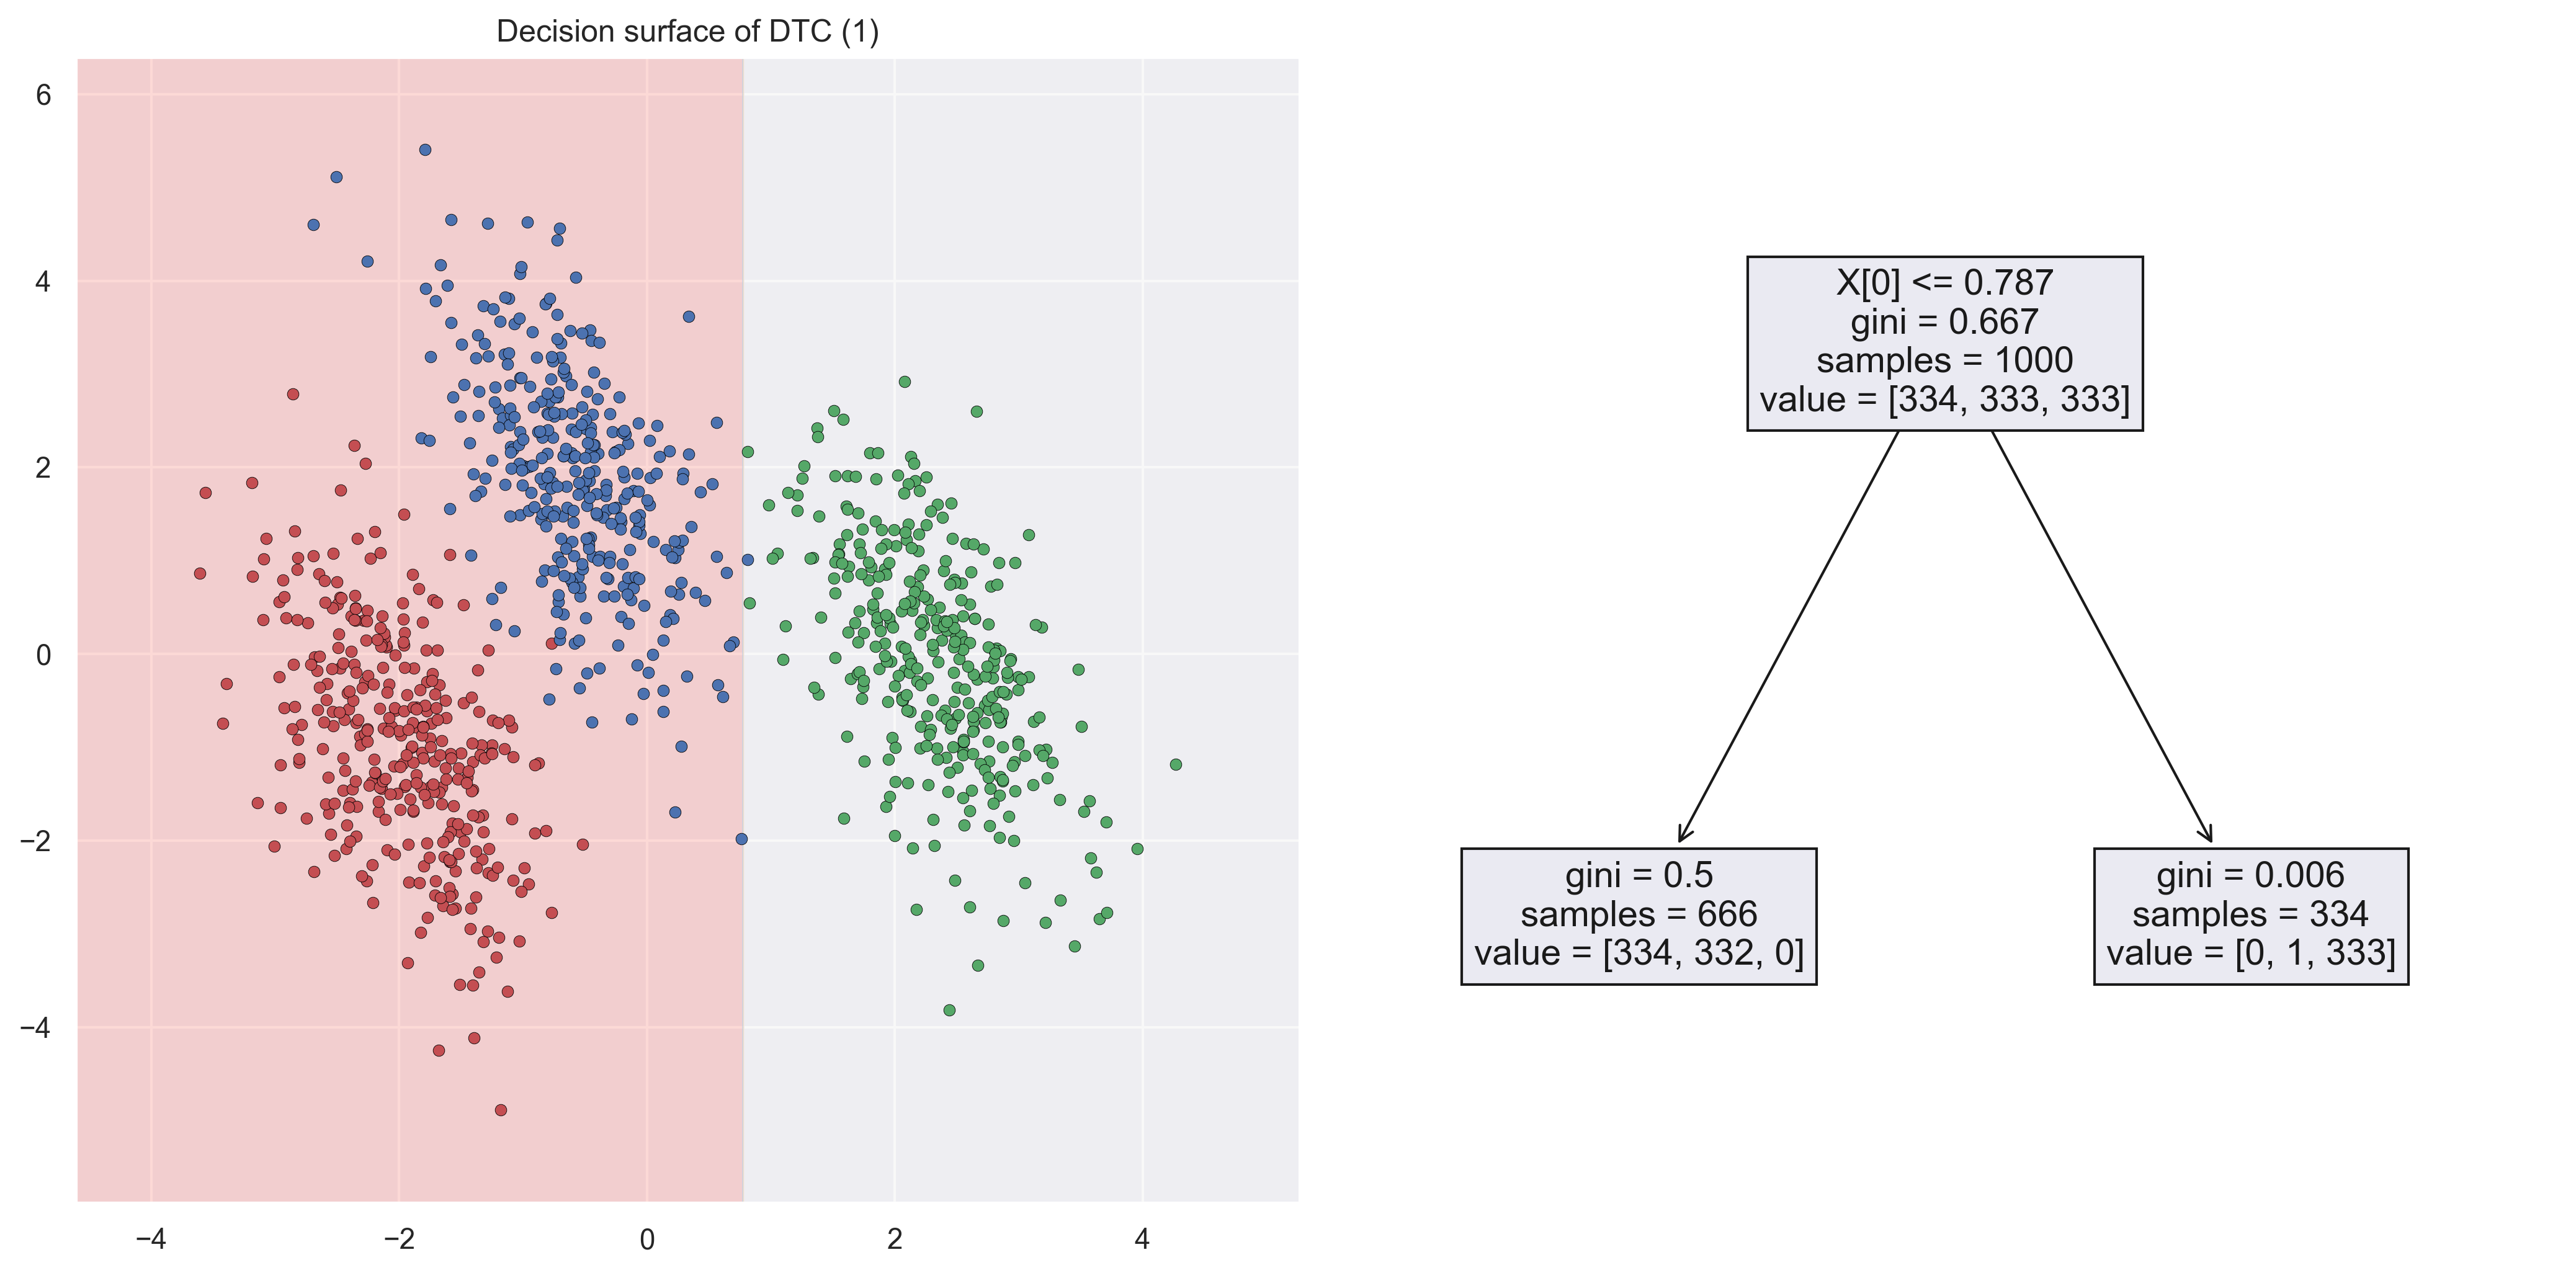

training score : 0.942 (depth=2)


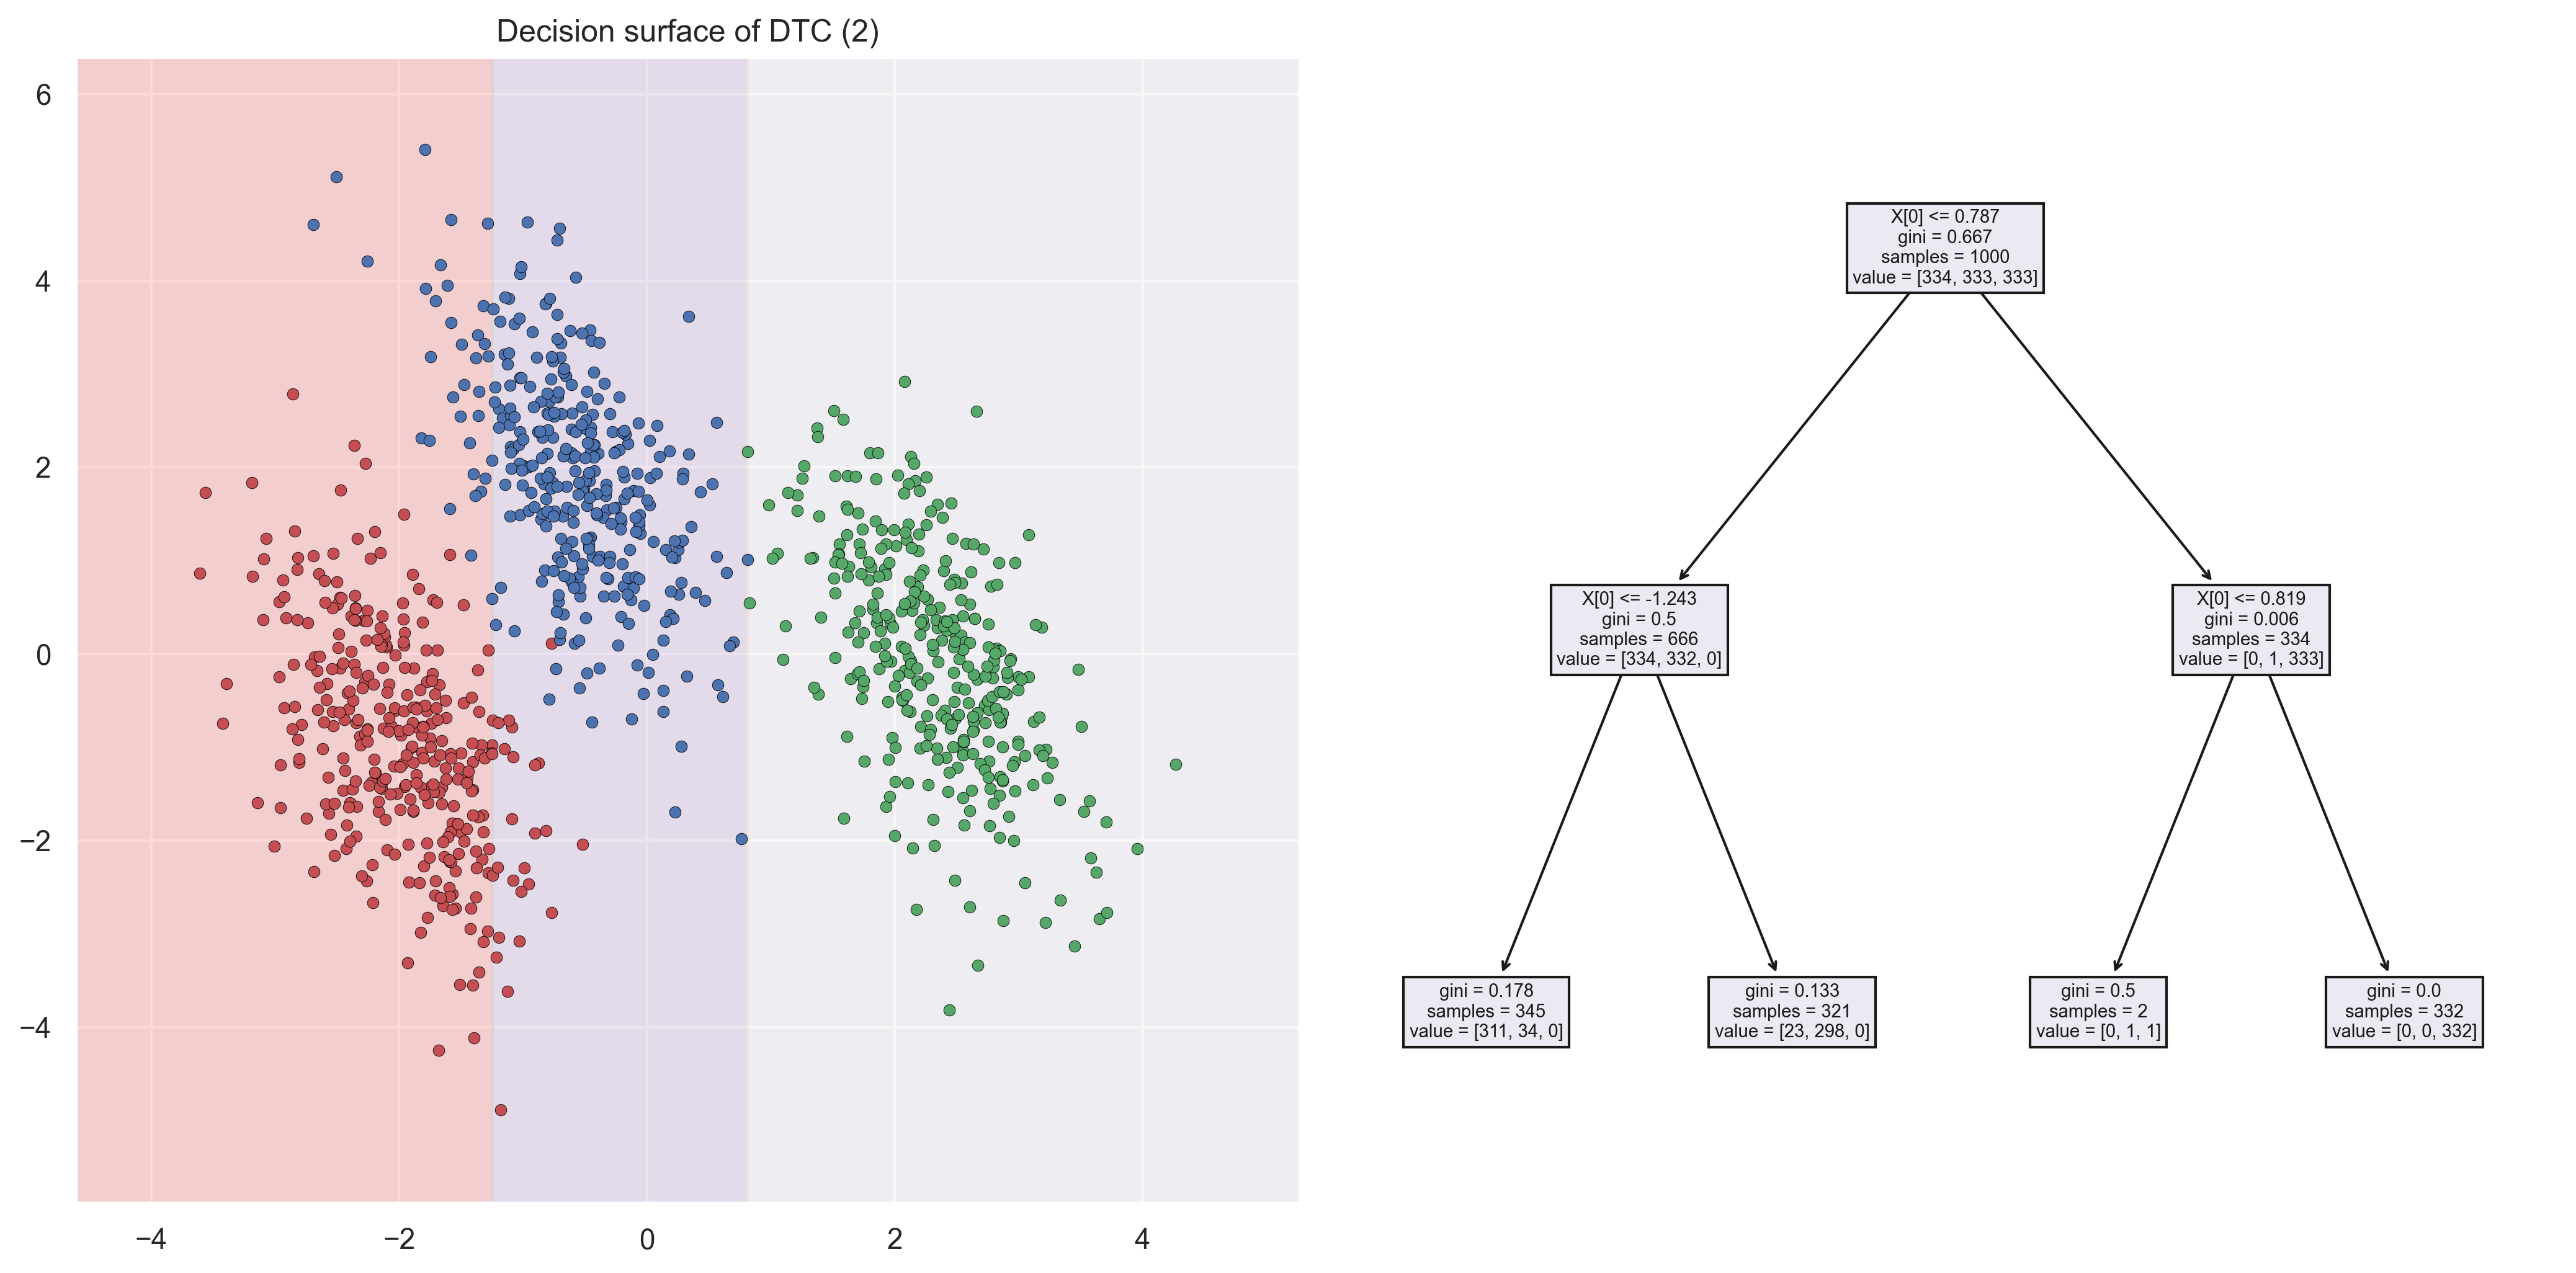

training score : 0.987 (depth=3)


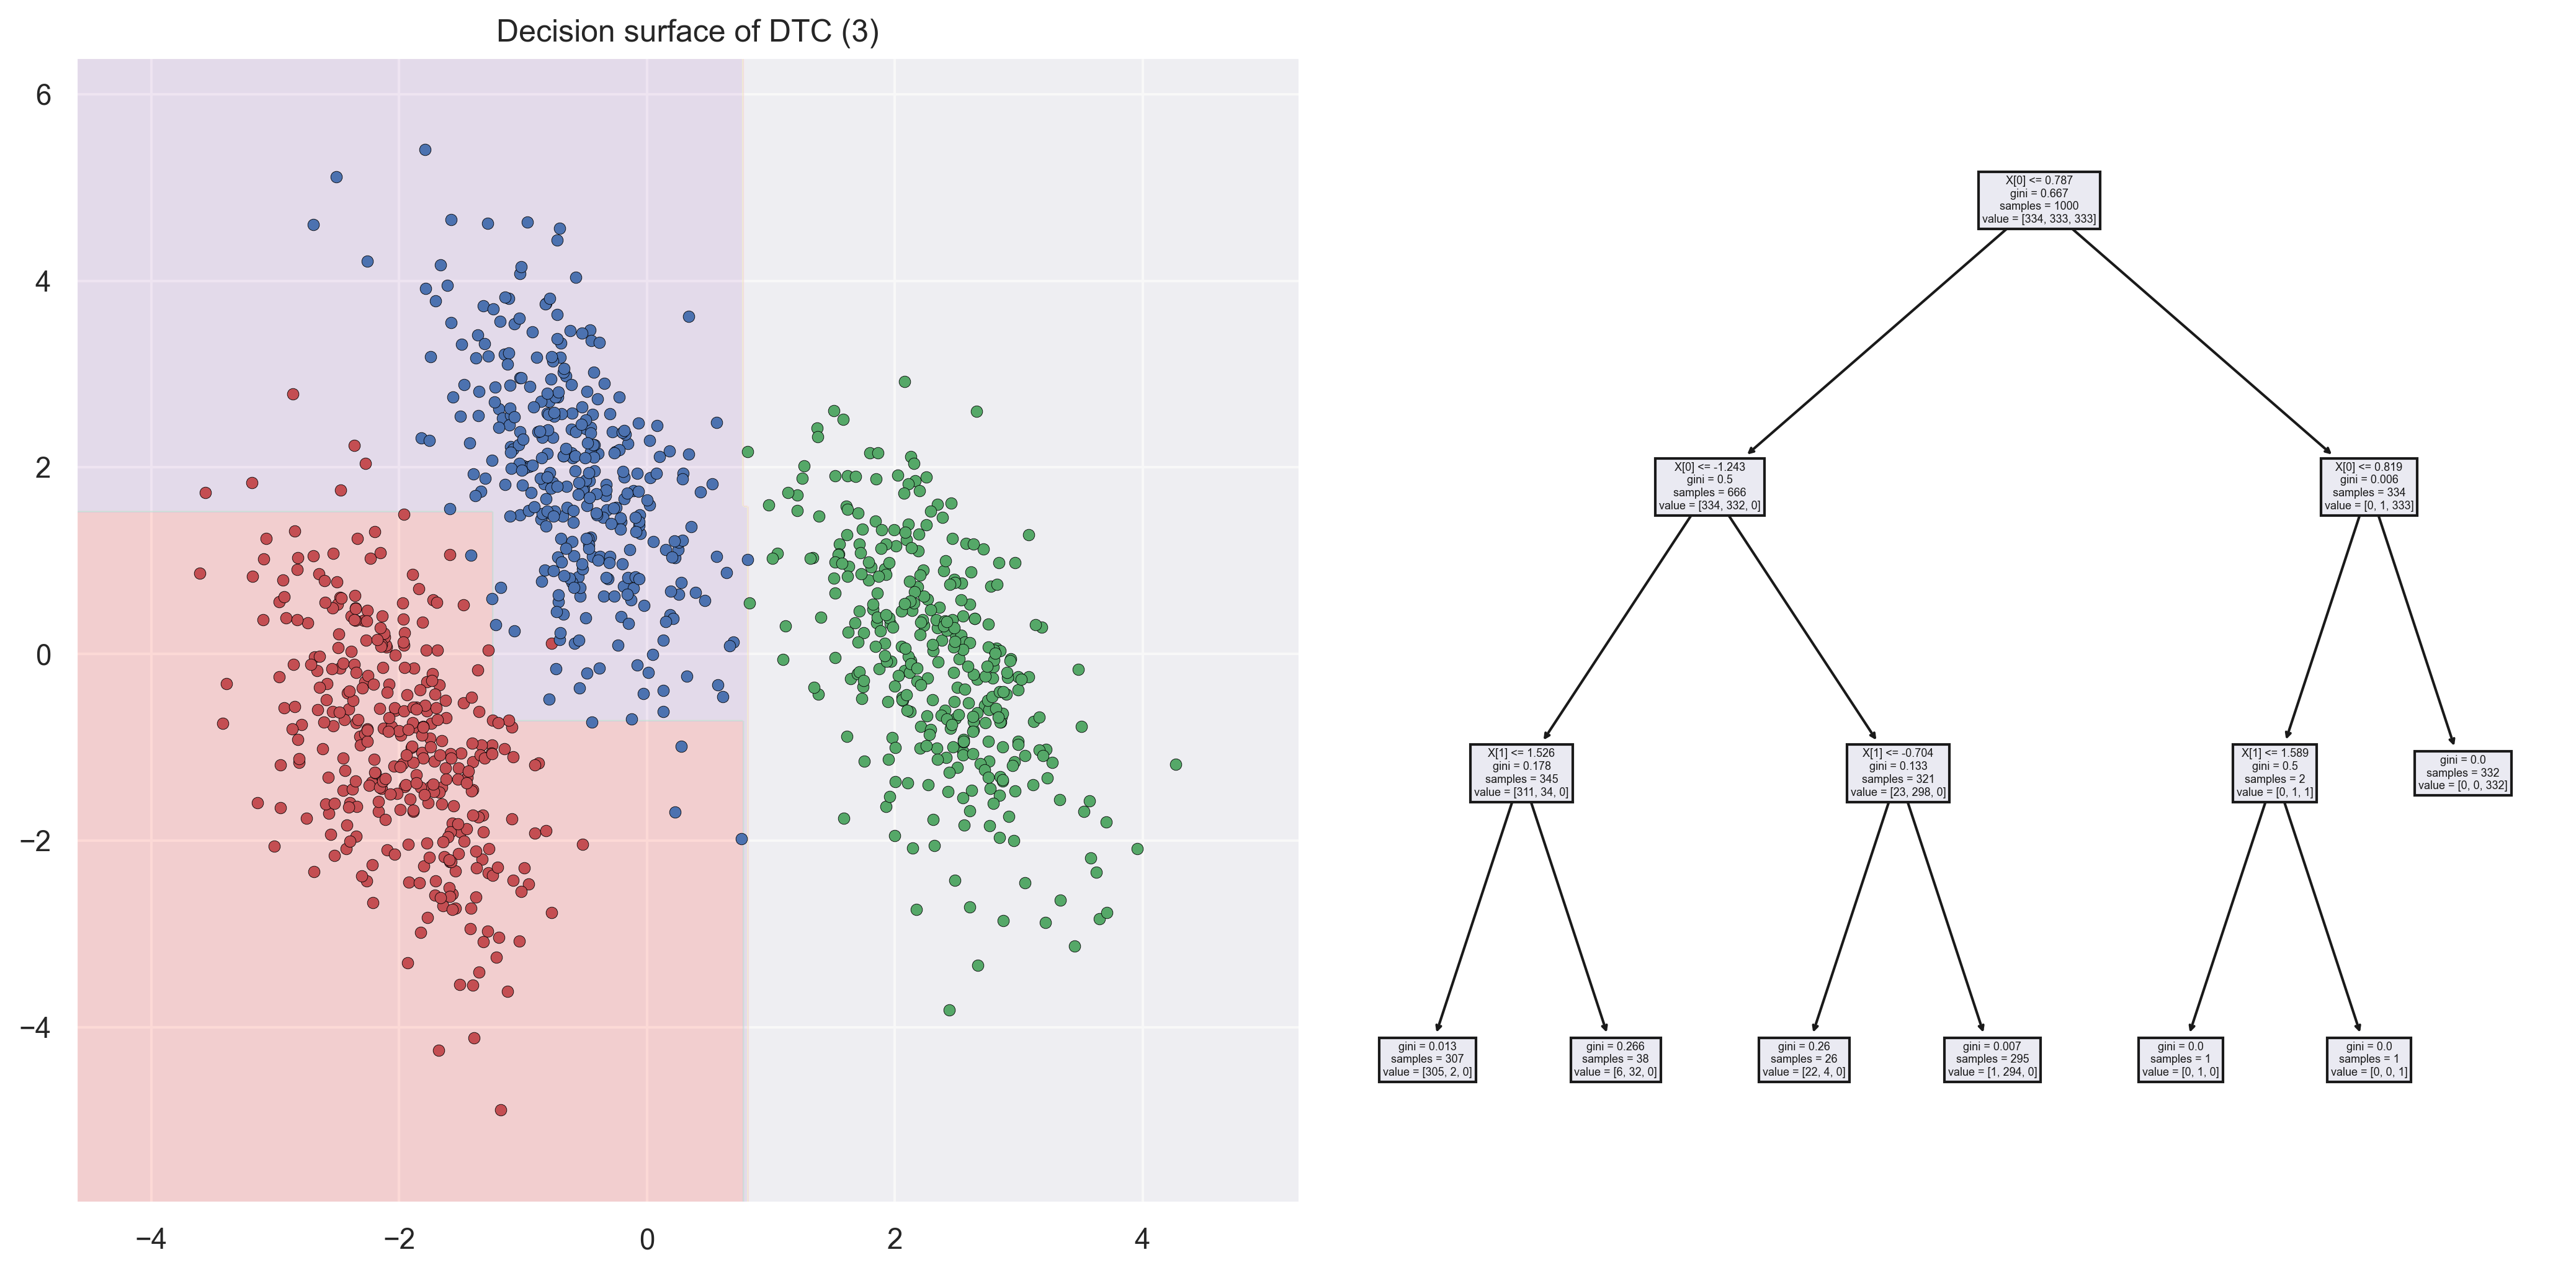

training score : 0.995 (depth=4)


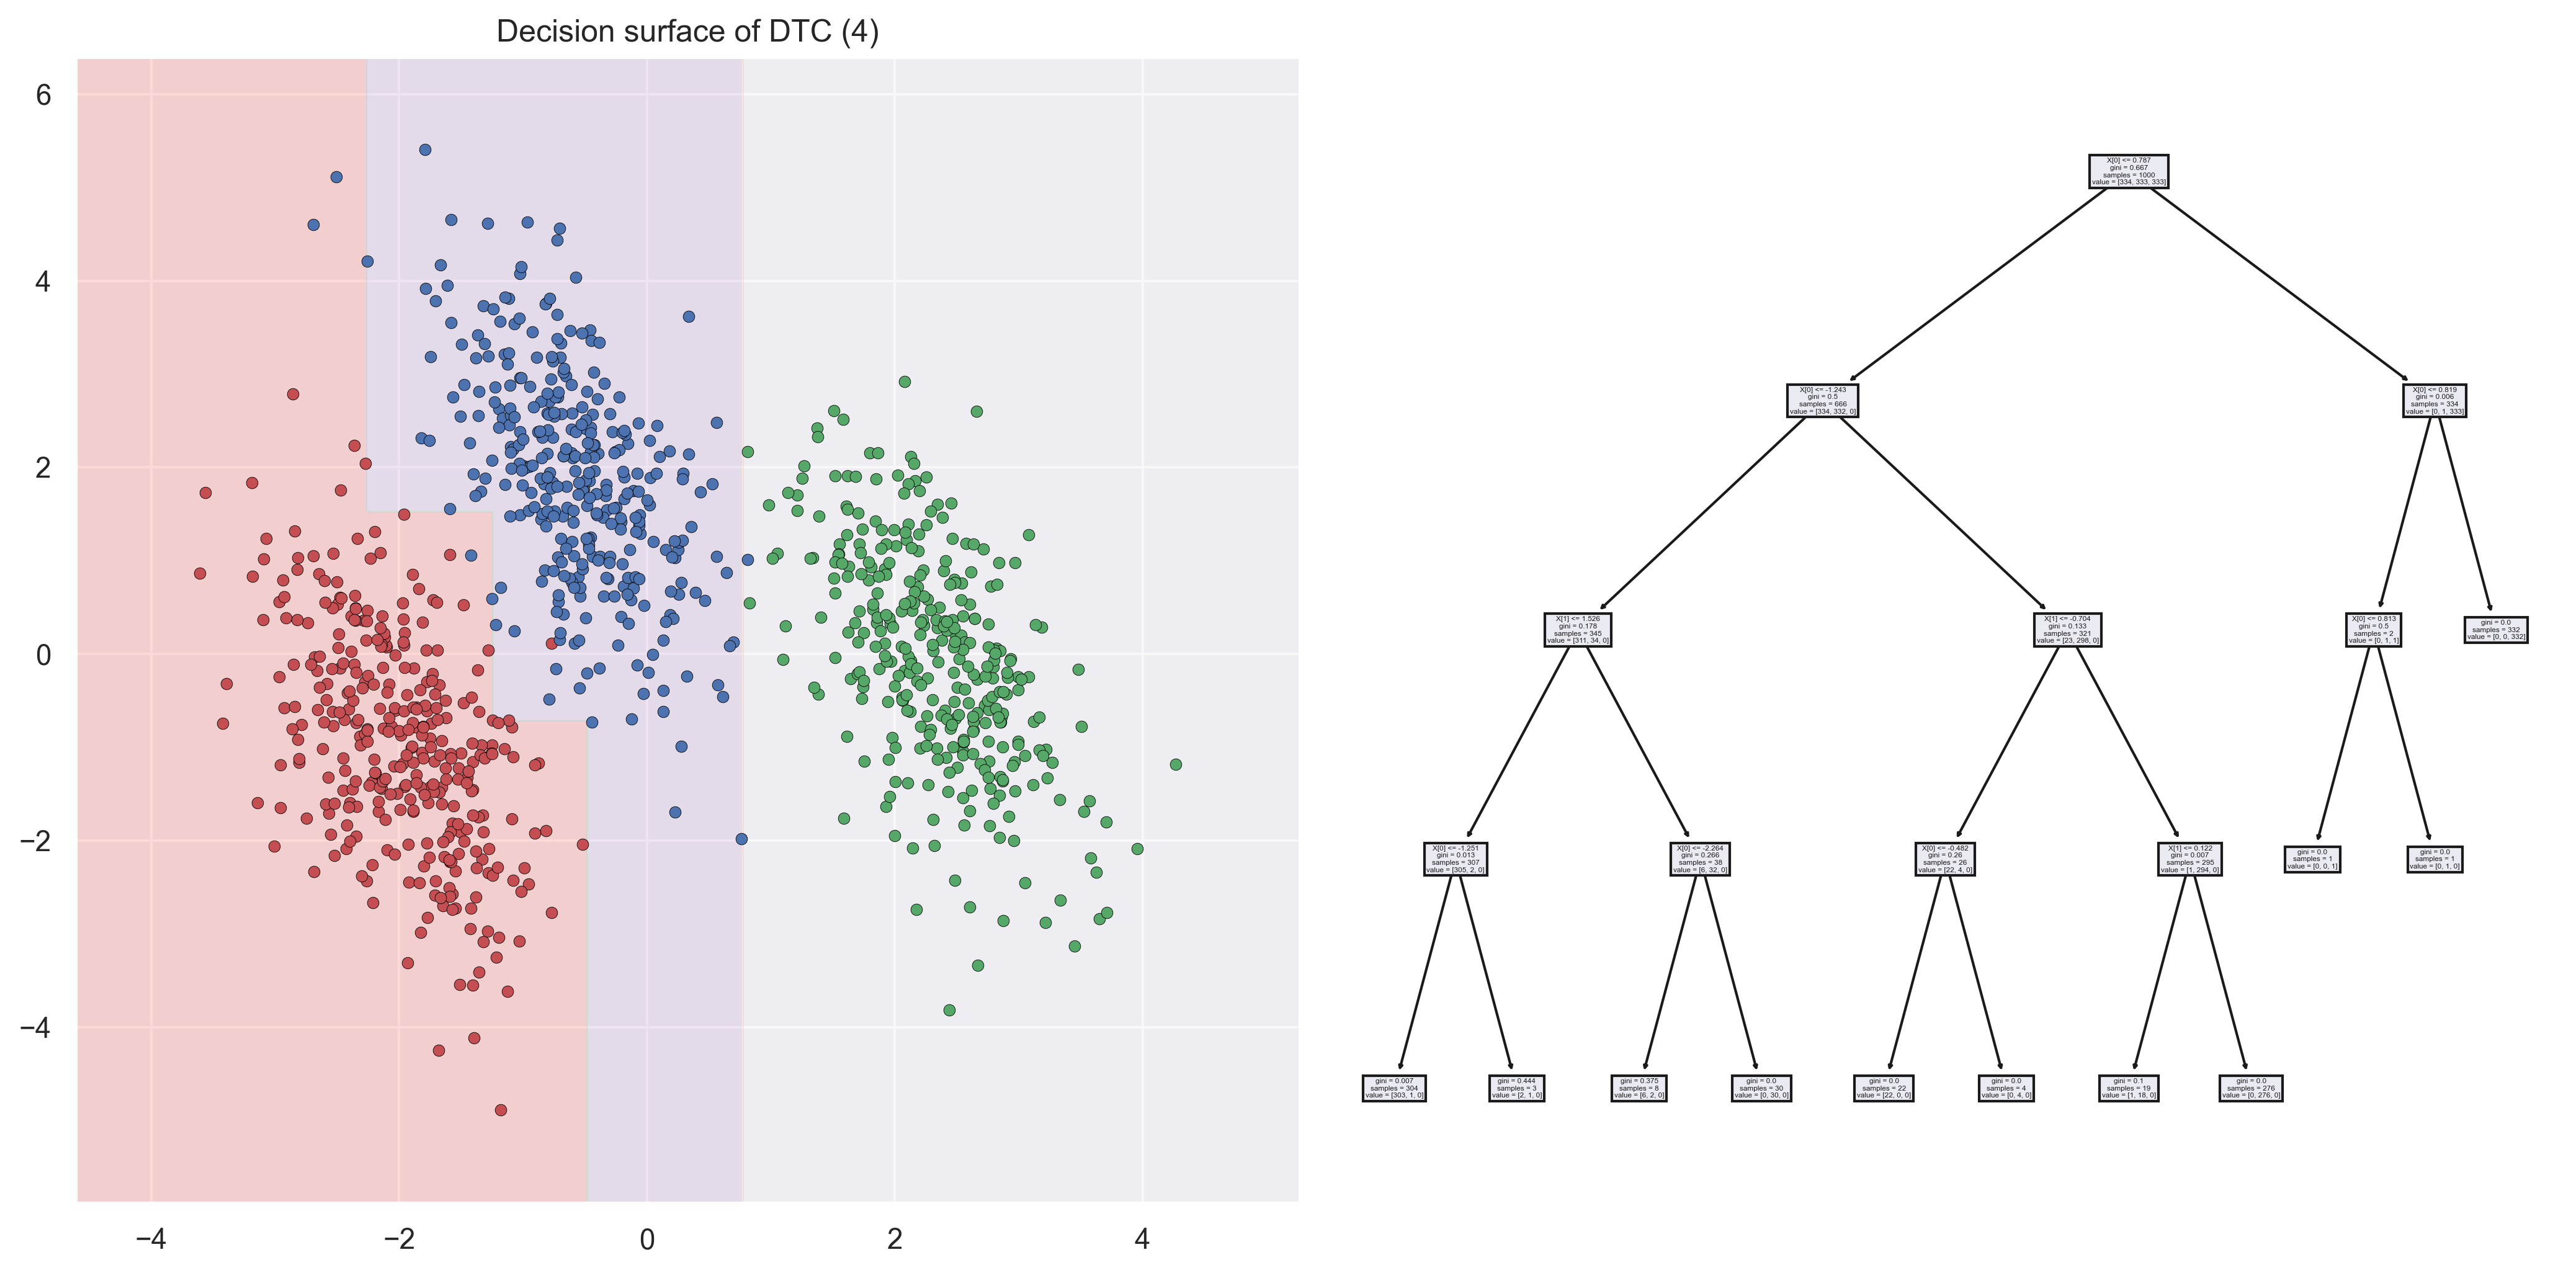

In [49]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)
dtcs = []
for depth in (1, 2, 3, 4):
    # do fit
    dtc = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')  # 'entropy'
    dtcs.append(dtc)
    dtc.fit(X, y)

    # print the training scores
    print("training score : %.3f (depth=%d)" % (dtc.score(X, y), depth))

    # get range for visualization
    x_0 = X[:, 0]
    x_1 = X[:, 1]
    x_min = x_0.min() - 1
    x_max = x_0.max() + 1
    y_min = x_1.min() - 1
    y_max = x_1.max() + 1

    fig, ax = plt.subplots(1, 2,  figsize=(14,7), dpi=300)
    plot_prediction_2d(x_min, x_max, y_min, y_max, classifier=dtc, ax=ax[0])
    
    ax[0].set_title("Decision surface of DTC (%d)" % depth)
    
    # Plot also the training points
    colors = "rbg"
    for i, color in zip(dtc.classes_, colors):
        idx = np.where(y == i)
        ax[0].scatter(x_0[idx], x_1[idx], c=color,
                    edgecolor='black', s=20, linewidth=0.2)

    with plt.style.context('classic'):
      tree.plot_tree(dtc, ax=ax[1]);

    #plt.tight_layout(0.5,0)
    plt.tight_layout()
    plt.show()

Given fraction of samples of class $i$ as $p_i$

* the Gini index is:
$$G = 1 - \sum_i {p_i^2}, $$

* the Entropy is:
$$E =  - \sum_i {p_i * log(p_i)}, $$

The optimization is performed in a greedy manner, one split at a time, minimizing impurity in the descendant nodes $G=G_1+G_2$ when the Gini index is used, or maximizing informatin gain: $IG = E_{node} - E_1 - E_2$

In [50]:
text_representation = tree.export_text(dtcs[2])
print(text_representation)

|--- feature_0 <= 0.79
|   |--- feature_0 <= -1.24
|   |   |--- feature_1 <= 1.53
|   |   |   |--- class: 0
|   |   |--- feature_1 >  1.53
|   |   |   |--- class: 1
|   |--- feature_0 >  -1.24
|   |   |--- feature_1 <= -0.70
|   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.70
|   |   |   |--- class: 1
|--- feature_0 >  0.79
|   |--- feature_0 <= 0.82
|   |   |--- feature_1 <= 1.59
|   |   |   |--- class: 1
|   |   |--- feature_1 >  1.59
|   |   |   |--- class: 2
|   |--- feature_0 >  0.82
|   |   |--- class: 2



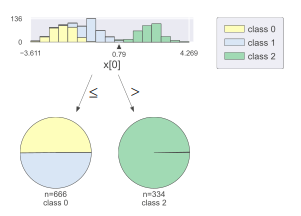

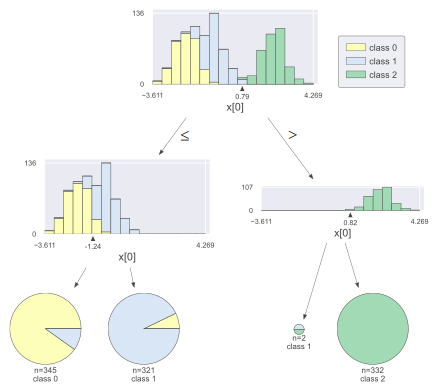

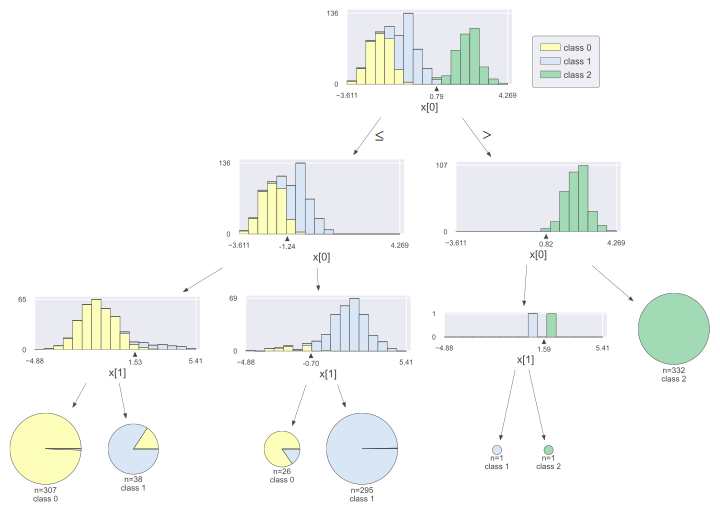

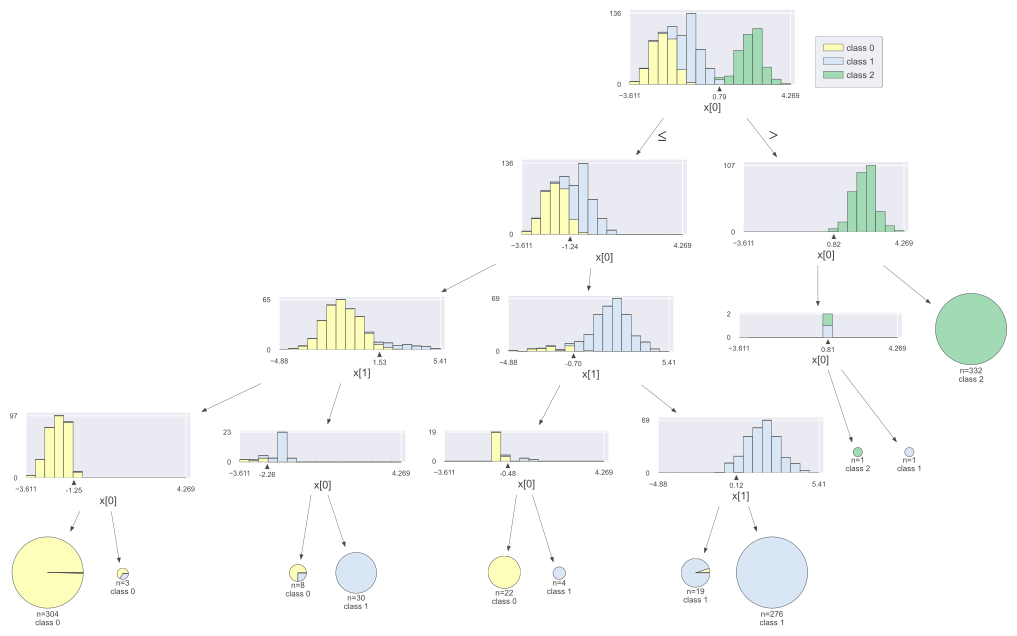

In [51]:
for i, dtc in enumerate(dtcs):
  viz = dtreeviz(dtc, X, y, feature_names=['x[0]', 'x[1]'])
  viz.scale=1.2
  display(viz)


Additionally we can directly inspect relevance of the input features for the classification (impurity based):

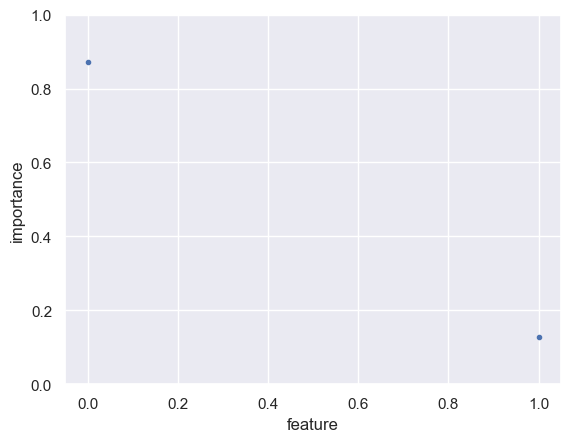

In [52]:
plt.plot(dtcs[2].feature_importances_, '.')
plt.xlabel('feature')
plt.ylabel('importance')
plt.ylim(0, 1);

## 2. Random Forest

The `sklearn.ensemble` provides several ensemble algorithms. RandomForest is an averaging algorithm based on randomized decision trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

Individual decision trees typically exhibit high variance and tend to overfit.
In random forests:
* each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.
* when splitting each node during the construction of a tree, the best split is found from a random subset of features, according to `max_features` parameter.

The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant, hence yielding an overall better model.


training score : 0.932 (n_est=1)


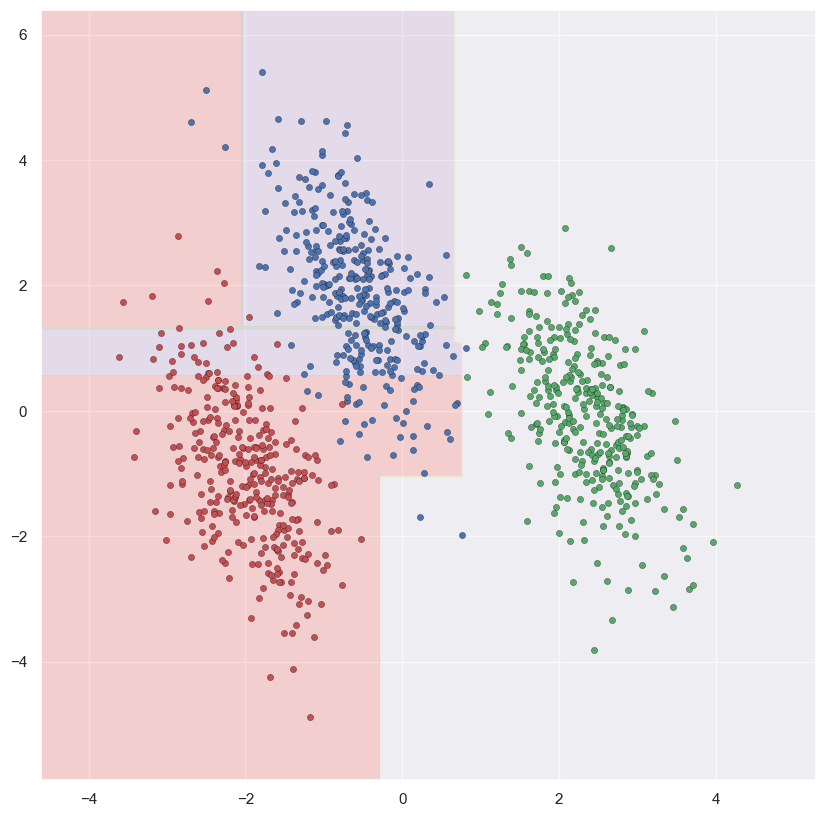

training score : 0.991 (n_est=4)


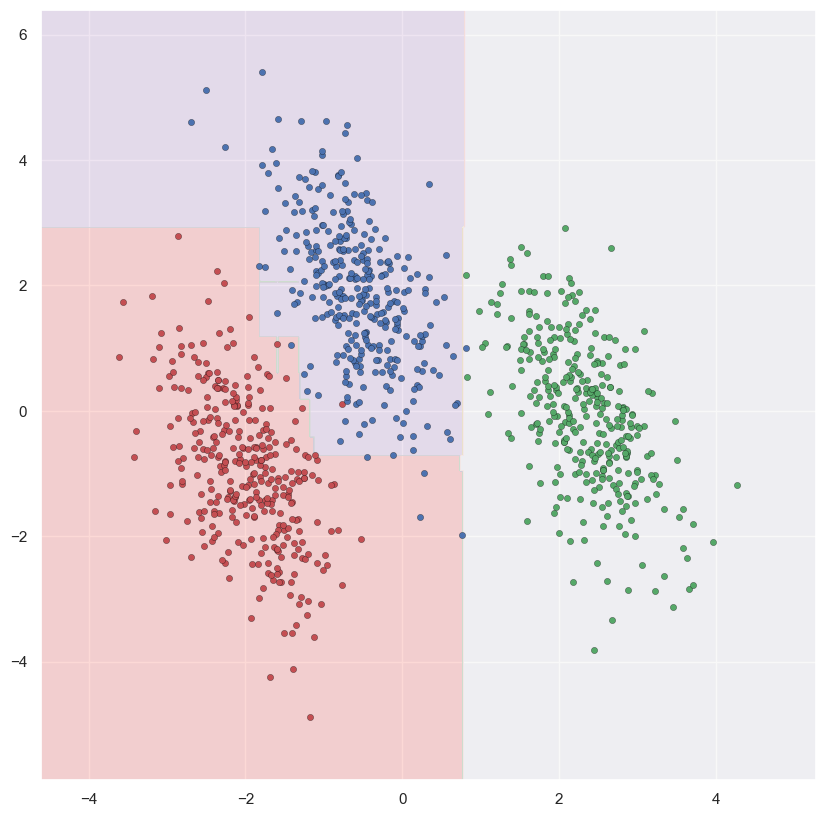

training score : 0.995 (n_est=50)


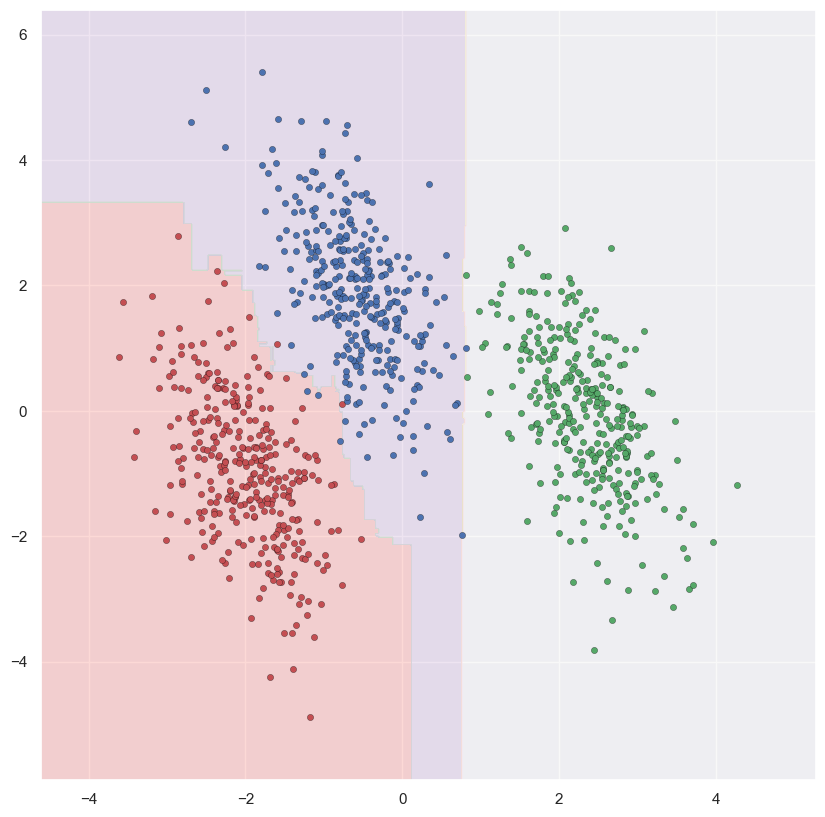

In [55]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for n_est in (1, 4, 50):
    # do fit
    rfc = ensemble.RandomForestClassifier(max_depth=4, n_estimators=n_est,) # n_estimators = number of trees
    rfc.fit(X, y)

    # print the training scores
    print("training score : %.3f (n_est=%d)" % (rfc.score(X, y), n_est))

    # get range for visualization
    x_0 = X[:, 0]
    x_1 = X[:, 1]
    x_min = x_0.min() - 1
    x_max = x_0.max() + 1
    y_min = x_1.min() - 1
    y_max = x_1.max() + 1

    plt.figure(figsize=(10,10))
    plot_prediction_2d(x_min, x_max, y_min, y_max, classifier=rfc)

    # Plot also the training points
    colors = 'rbg'
    for i, color in enumerate(colors):
        idx = np.where(y == i)
        plt.scatter(x_0[idx], x_1[idx], c=color,
                    edgecolor='black', s=20, linewidth=0.2)
    
    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()


    plt.show()

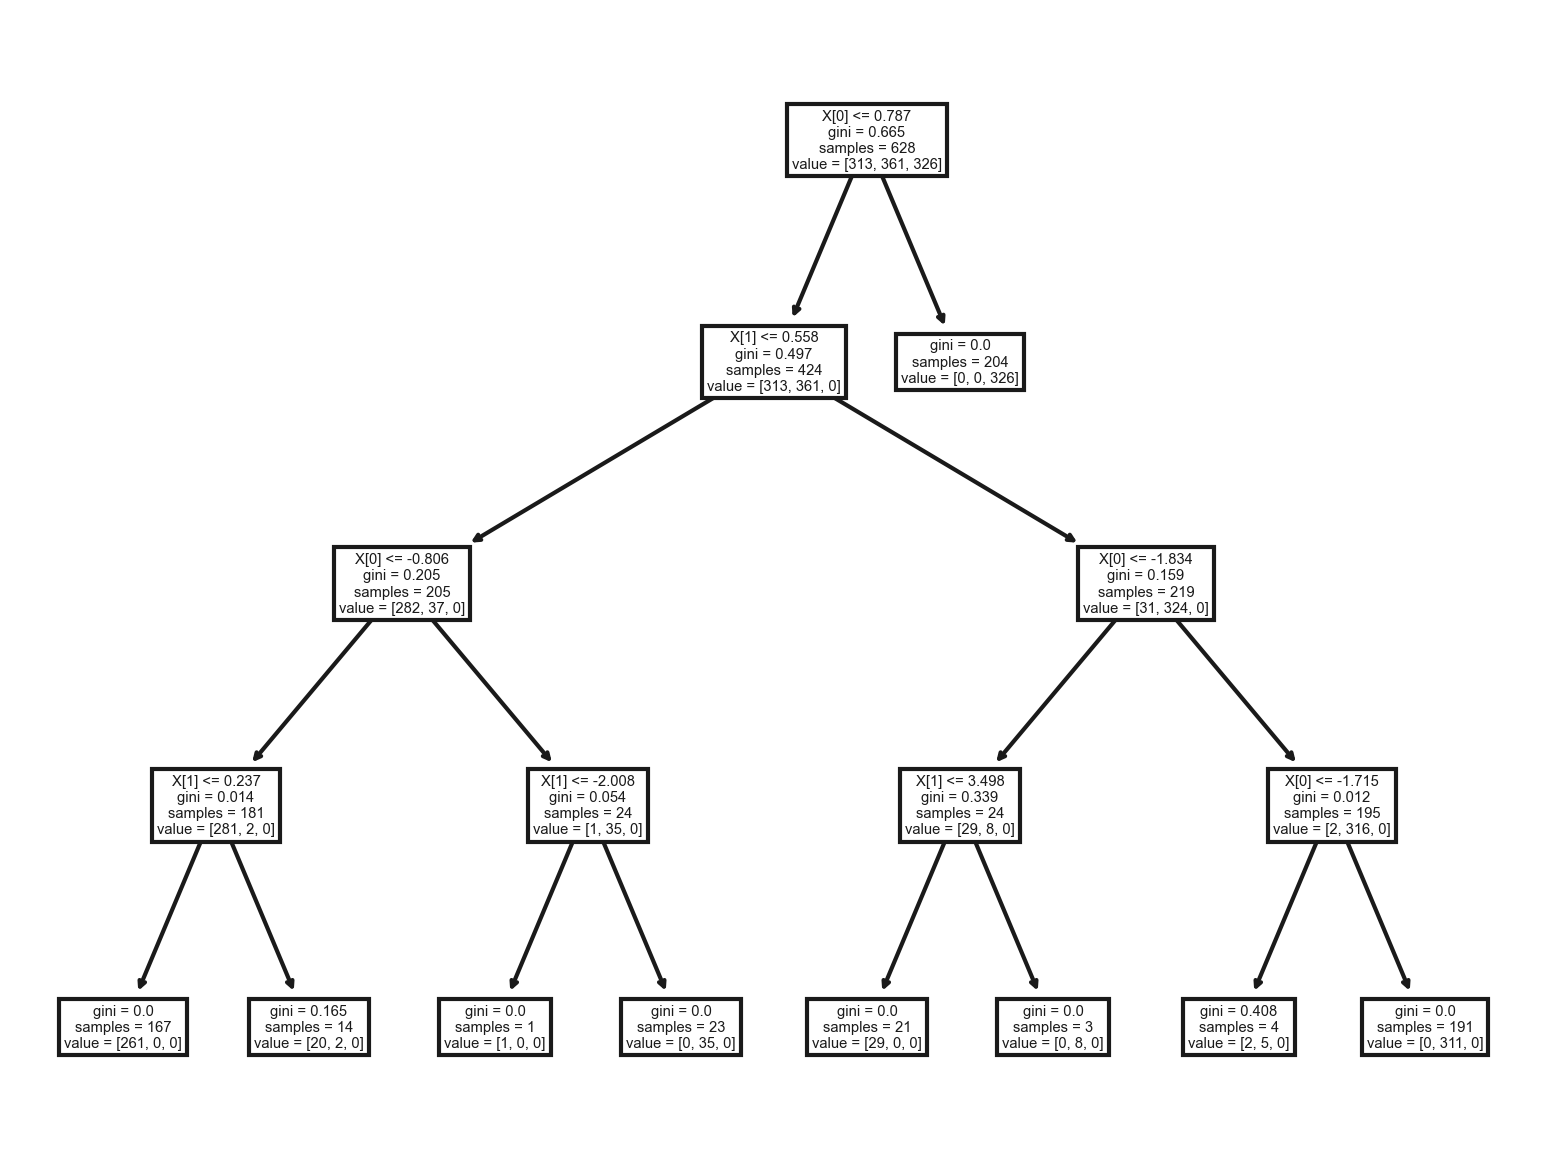

In [56]:
plt.figure(dpi=300)
with plt.style.context('classic'):
  tree.plot_tree(rfc.estimators_[20]);

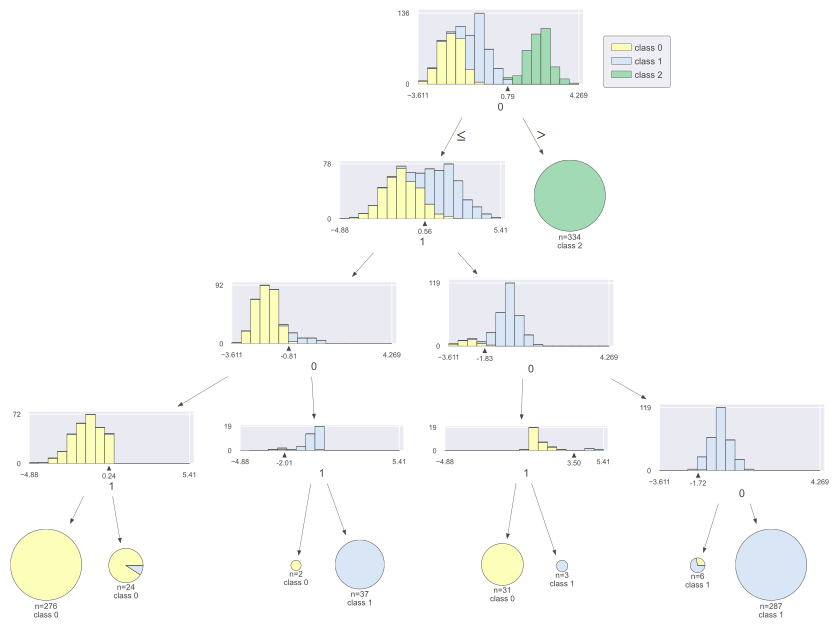

In [57]:
  viz = dtreeviz(rfc.estimators_[20], X, y, feature_names=[f'{i}' for i in np.arange(len(X[0]))])
  viz.scale=1.2
  display(viz)

For a forest we can also evaluate the feature importance:

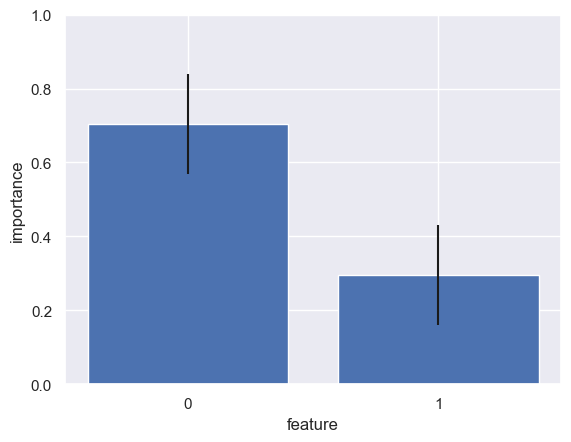

In [58]:
importances = np.array([e.feature_importances_ for e in rfc.estimators_])

#plt.plot(importances.T, '.')
plt.bar(['0', '1'], importances.mean(axis=0), yerr=importances.std(axis=0))
plt.xlabel('feature')
plt.ylabel('importance')
plt.ylim(0, 1);

Alternatively we can use permutation to study feature importance. 
It evaluates decrease in performance (model's `.score` or specified in `scoring` parameter) for each variable when its values is shuffled between samples. 
It can be time-consuming as requires re-evaluation for each feature:

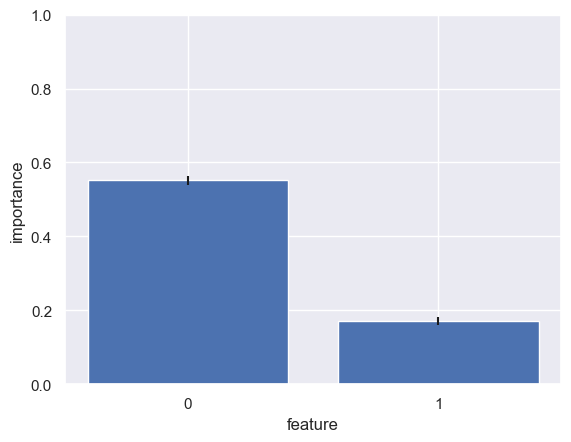

In [59]:
p_importances = permutation_importance(rfc, X, y, n_repeats=10, n_jobs=-1)

plt.bar(['0', '1'],
        p_importances.importances_mean,
        yerr=p_importances.importances_std)
plt.xlabel('feature')
plt.ylabel('importance')
plt.ylim(0, 1);

## 3. Boosted Decision Trees

Another approach to the ensemble tree modeling is Boosted Decision Trees. In a boosting framework, the treees are created sequentially. This way each next tree reduces error of the ensamble, by fitting residuals of previous trees.

Usually shallow trees are used in boosting framework. In boosting primarily the bias is reduced, thus increasing variance. Interpretability of this model is low.

To avoid overfitting the learning rate and subsampling parameter can be tuned.

training score : 0.940 (n_est=1)


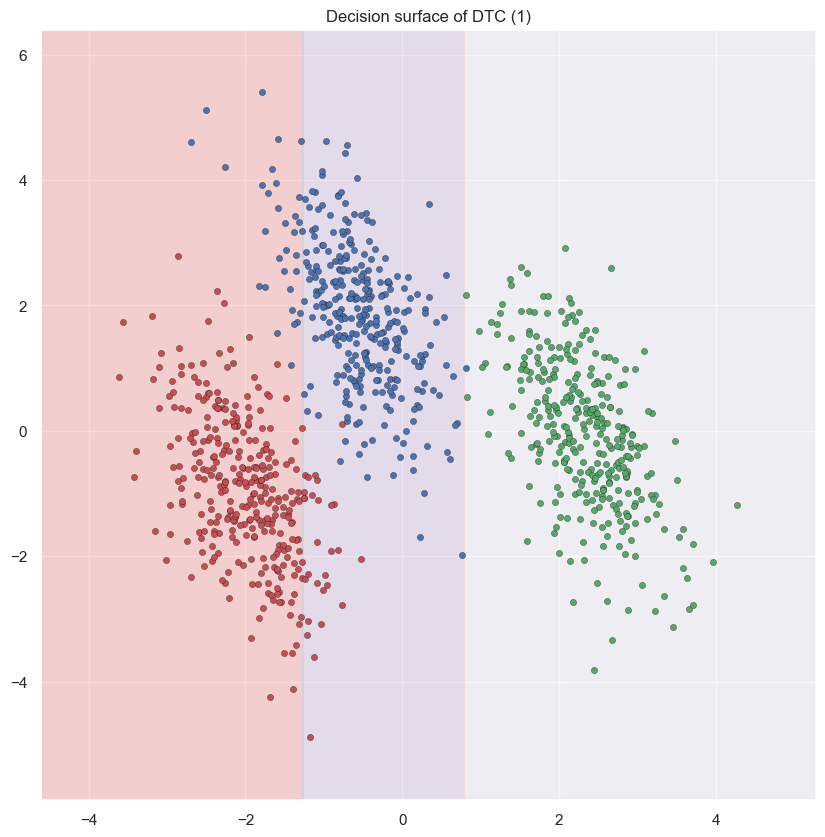

training score : 0.945 (n_est=4)


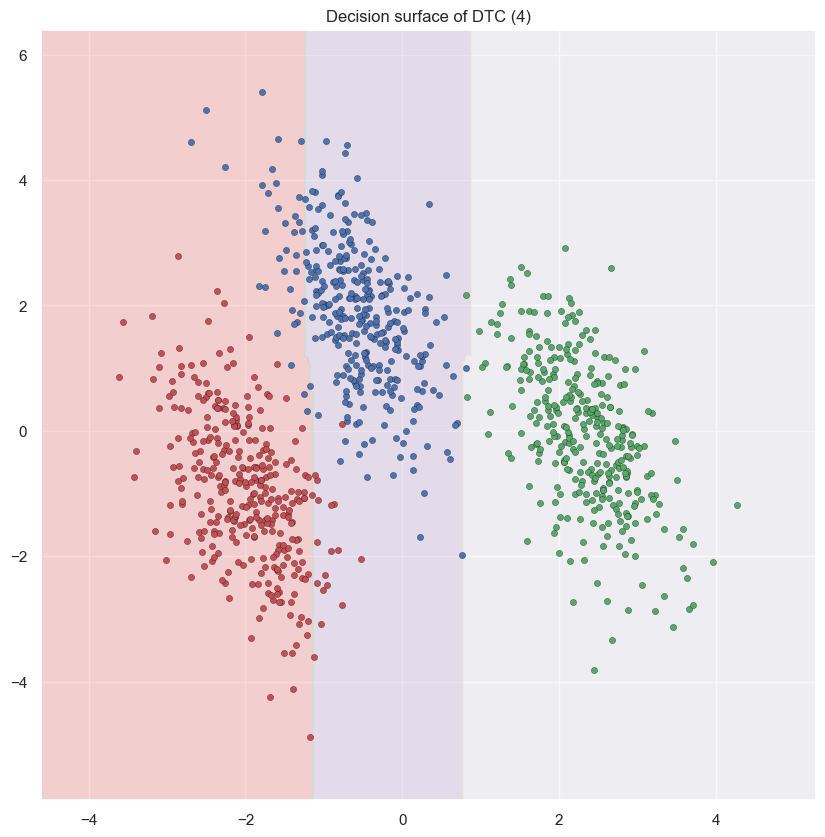

training score : 0.993 (n_est=50)


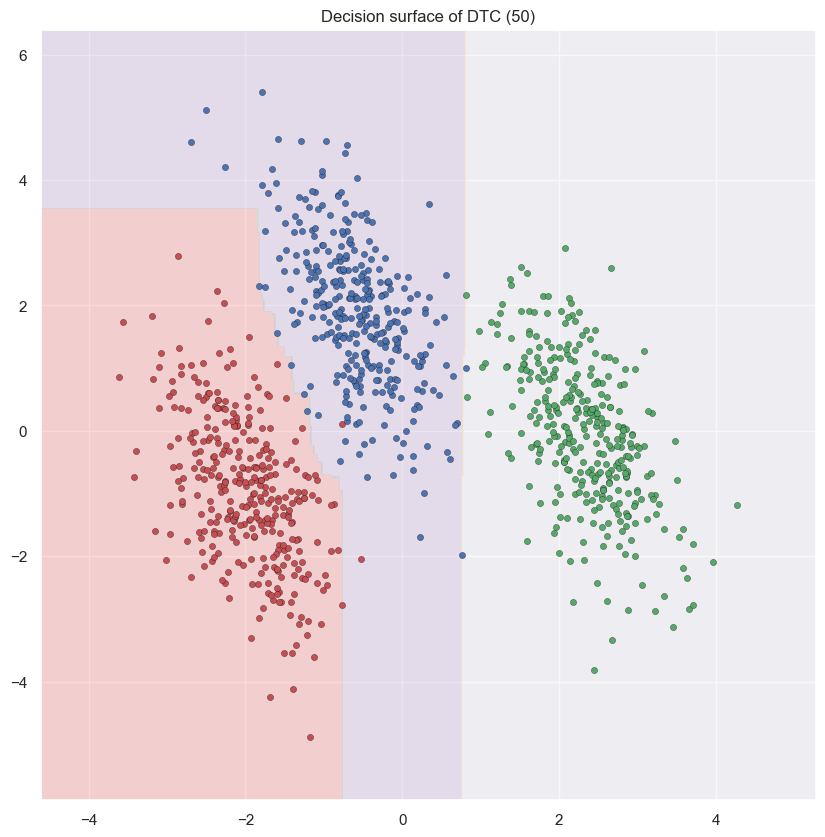

In [61]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2],[-0.4, 1.2]]
X = np.dot(X, transformation)

for n_est in (1, 4, 50):
    # do fit
    dtc = ensemble.GradientBoostingClassifier(max_depth=1, n_estimators=n_est,
                                              learning_rate=0.1, subsample=0.5)
    dtc.fit(X, y)

    # print the training scores
    print("training score : %.3f (n_est=%d)" % (dtc.score(X, y), n_est))

    x_0 = X[:, 0]
    x_1 = X[:, 1]
    x_min = x_0.min() - 1
    x_max = x_0.max() + 1
    y_min = x_1.min() - 1
    y_max = x_1.max() + 1

    plt.figure(figsize=(10,10))
    plot_prediction_2d(x_min, x_max, y_min, y_max, classifier=dtc)
    
    plt.title(f'Decision surface of DTC ({n_est})')
    plt.axis('tight')

    # Plot also the training points
    colors = 'rbg'
    for i, color in enumerate(colors):
        idx = np.where(y == i)
        plt.scatter(x_0[idx], x_1[idx], c=color,
                    edgecolor='black', s=20, linewidth=0.2)
    
    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()


    plt.show()

## EXERCISE 3 : Random forest classifier for FMNIST


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

n = len(train_labels)
x_train = train_images.reshape((n, -1))
y_train = train_labels

n_test = len(test_labels)
x_test = test_images.reshape((n_test, -1))
y_test = test_labels

Classify fashion MNIST images with Random Forest classifier.

In [ ]:
# 1. Create classifier. As the number of features is big (784), use bigger tree
# depth (max_depth parameter), try in range 10-500.

# 2. What is the maximum number of leaves in tree of depth n?
# To reduce variance we should avoid leaves with too litle samples. You could
# limit the total number of tree leaves (max_leaf_nodes parameter) to 10-1000.
# Alternatively you can use min_samples_split & min_samples_leaf

# 3. Try different number of estimators (n_estimators)

# 4. Fit the model

# 5. Inspect training and test accuracy

## EXERCISE 4: Random forest regression


In [ ]:
X, y, (df_x, df_y) = house_prices_dataset(return_df_xy=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Predict the house prices.

In [ ]:
# 1. Create regressor. (ensemble.RandomForestRegressor)
# Try different number of estimators (n_estimators)

# 2. Fit the model

# 3. Inspect training and test accuracy

# 4. Try to improve performance by adjusting hyperparameters. 
# How does it compare to linear model?

# 5. Use dtreeviz to visualize a tree from the ensamble

# 6. Study the feature importance
